In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

#ARIMA
# from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# import pmdarima as pm
# from pmdarima.model_selection import train_test_split
# import itertools
import warnings
warnings.filterwarnings('ignore') 
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

%matplotlib inline


np.set_printoptions(formatter={'float_kind':'{:f}'.format})


In [2]:
import pypyodbc as podbc

conn2 = podbc.connect("Driver={SQL Server Native Client 11.0};"
                     "Server=LAPTOP_LYNDA;"
                     "Database=DW_Finance;"
                     "Trusted_Connection=yes;")

# rynning the SQL query i need
df= pd.read_sql_query('''SELECT * FROM [dbo].[orders]''', conn2)

# Viz
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [ ]:
#df=pd.read_csv('/var/ORDERS (1).csv')

In [34]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [3]:
df.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99441 non-null  object
 5   order_delivered_carrier_date   99441 non-null  object
 6   order_delivered_customer_date  99441 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
df.shape

(99441, 8)

In [6]:
# Conversion des dates
date_cols = ['order_purchase_timestamp', 'order_approved_at',
             'order_delivered_carrier_date', 'order_delivered_customer_date',
             'order_estimated_delivery_date']

df[date_cols] = df[date_cols].apply(pd.to_datetime, errors='coerce')

In [7]:
# Filtrer uniquement les commandes livrées
df = df[df['order_status'] == 'delivered'].copy()

In [8]:

# Création de la variable cible
df['late_delivery'] = (df['order_delivered_customer_date'] > df['order_estimated_delivery_date']).astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96478 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96478 non-null  object        
 1   customer_id                    96478 non-null  object        
 2   order_status                   96478 non-null  object        
 3   order_purchase_timestamp       96478 non-null  datetime64[ns]
 4   order_approved_at              96464 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96476 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96478 non-null  datetime64[ns]
 8   late_delivery                  96478 non-null  int64         
dtypes: datetime64[ns](5), int64(1), object(3)
memory usage: 7.4+ MB


In [10]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,late_delivery
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15,0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26,0


In [11]:

# Calcul des features temporelles
df['approval_delay_hours'] = (df['order_approved_at'] - df['order_purchase_timestamp']).dt.total_seconds() / 3600
df['carrier_handling_days'] = (df['order_delivered_carrier_date'] - df['order_approved_at']).dt.days
df['transit_days'] = (df['order_delivered_customer_date'] - df['order_delivered_carrier_date']).dt.days
df['total_estimated_days'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days


In [12]:
# Features temporelles supplémentaires
df['purchase_day_of_week'] = df['order_purchase_timestamp'].dt.dayofweek
df['purchase_month'] = df['order_purchase_timestamp'].dt.month
df['purchase_hour'] = df['order_purchase_timestamp'].dt.hour
df['purchase_season'] = df['order_purchase_timestamp'].dt.month % 12 // 3 + 1


In [13]:
df.isnull().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
late_delivery                     0
approval_delay_hours             14
carrier_handling_days            16
transit_days                      9
total_estimated_days              0
purchase_day_of_week              0
purchase_month                    0
purchase_hour                     0
purchase_season                   0
dtype: int64

In [14]:
# Suppression des valeurs manquantes
features = ['approval_delay_hours', 'carrier_handling_days', 'transit_days',
            'total_estimated_days', 'purchase_day_of_week', 'purchase_month',
            'purchase_hour', 'purchase_season']
df = df.dropna(subset=features + ['late_delivery'])

In [15]:
df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
late_delivery                    0
approval_delay_hours             0
carrier_handling_days            0
transit_days                     0
total_estimated_days             0
purchase_day_of_week             0
purchase_month                   0
purchase_hour                    0
purchase_season                  0
dtype: int64

In [16]:
# Features temporelles supplémentaires
df['purchase_day_of_week'] = df['order_purchase_timestamp'].dt.dayofweek
df['purchase_month'] = df['order_purchase_timestamp'].dt.month
df['purchase_hour'] = df['order_purchase_timestamp'].dt.hour
df['purchase_season'] = df['order_purchase_timestamp'].dt.month % 12 // 3 + 1


In [17]:
# Suppression des valeurs manquantes
features = ['approval_delay_hours', 'carrier_handling_days', 'transit_days',
            'total_estimated_days', 'purchase_day_of_week', 'purchase_month',
            'purchase_hour', 'purchase_season']
df = df.dropna(subset=features + ['late_delivery'])

In [18]:
# Distribution de la variable cible
class_distribution = df['late_delivery'].value_counts(normalize=True)
print(f"Distribution des classes:\n{class_distribution}")

Distribution des classes:
late_delivery
0    0.918874
1    0.081126
Name: proportion, dtype: float64


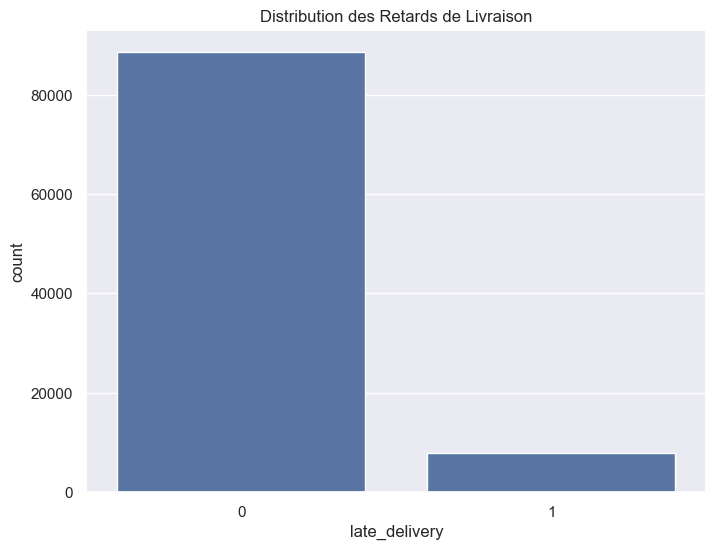

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='late_delivery', data=df)
plt.title('Distribution des Retards de Livraison')
plt.show()

Creation Modele 


1.RandomForestClassifier Result:

In [22]:
X1 = df[features]
y1 = df['late_delivery']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
model = RandomForestClassifier(random_state=42)
model.fit(X_train1, y_train1)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred1 = model.predict(X_test1)
print(classification_report(y_test1, y_pred1))

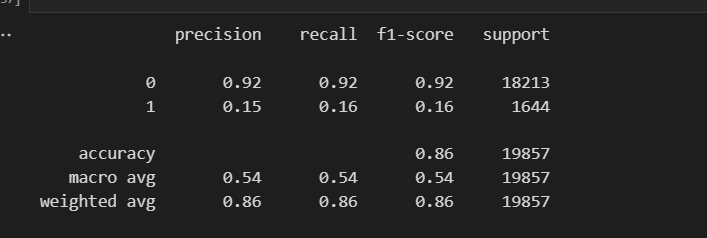

In [25]:
# Créer le modèle avec équilibrage automatique des classes
model1 = RandomForestClassifier(class_weight='balanced', random_state=42)

# Entraînement
model.fit(X_train1, y_train1)

# Prédictions
y_pred11 = model.predict(X_test1)

# Rapport de performance
print(classification_report(y_test1, y_pred11))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     17751
           1       0.96      0.85      0.90      1540

    accuracy                           0.99     19291
   macro avg       0.97      0.92      0.95     19291
weighted avg       0.99      0.99      0.99     19291



In [27]:
%pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 279.5 kB/s eta 0:08:55
   ---------------------------------------- 0.5/150.0 MB 279.5 kB/s eta 0:08:55
   ---------------------------------------- 0.5/150.0 MB 279.5 kB/s eta 0:08:55
   ---------------------------------------- 0.5/150.0 MB 279.5 kB/s eta 0:08:55
   ---------------------------------------- 0.5/150.0 MB 279.5 kB/s eta 0:08:55
   -----------------------------

In [29]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [28]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Séparation des données
X = df[features]
y = df['late_delivery']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Calcul du ratio de déséquilibre
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Modèle XGBoost
model = XGBClassifier(
    objective='binary:logistic', #une classification binaire avec une fonction logistique pour prédire des probabilités entre 0 et 1.
    scale_pos_weight=scale_pos_weight, #pour gérer le déséquilibre des classes
    eval_metric='logloss',# une métrique d'évaluation pour la fonction de perte logistique
    random_state=42,# pour la reproductibilité
    max_depth=5,# profondeur maximale de l'arbre
    learning_rate=0.1, #taux d'apprentissage
    n_estimators=200,# nombre d'arbres à construire
    subsample=0.8,# échantillonnage aléatoire des observations pour chaque arbre
    colsample_bytree=0.8## échantillonnage aléatoire des caractéristiques pour chaque arbre
)

model.fit(X_train, y_train)

# Évaluation
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     17726
           1       0.83      0.99      0.91      1565

    accuracy                           0.98     19291
   macro avg       0.92      0.99      0.95     19291
weighted avg       0.99      0.98      0.98     19291


Confusion Matrix:
[[17415   311]
 [   10  1555]]
